In [ ]:

import numpy as np 
from sklearn.utils import shuffle
import random
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from sklearn import svm
from sklearn.metrics import matthews_corrcoef
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import metrics


from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn import preprocessing


import pandas as pd
import pickle



In [ ]:
#feature Extraction -Amino acid compsition
#ACP740
def AAC_740():
    df = pd.read_csv("/content/Acp740AACEncoding.csv",header=None)
    df.columns=['label','AAC_A','AAC_C','AAC_D','AAC_E','AAC_F','AAC_G','AAC_H','AAC_I','AAC_K','AAC_L','AAC_M','AAC_N','AAC_P','AAC_Q','AAC_R','AAC_S','AAC_T','AAC_V','AAC_W','AAC_Y']
    data1 = df.drop(columns='label',axis=1)
    X_aac = np.array(data1)
    label=df['label']
    return np.array(X_aac),label

In [ ]:
#feature extraction - Amino acid composition
#ACP240
def AAC_240():
    df = pd.read_csv("/content/Acp240AACEncoding.csv",header=None)
    df.columns=['label','AAC_A','AAC_C','AAC_D','AAC_E','AAC_F','AAC_G','AAC_H','AAC_I','AAC_K','AAC_L','AAC_M','AAC_N','AAC_P','AAC_Q','AAC_R','AAC_S','AAC_T','AAC_V','AAC_W','AAC_Y']
    data2 = df.drop(columns='label',axis=1)
    X_aac = np.array(data2)
    label=df['label']
    return np.array(X_aac),label

0.8513513513513513 0.8970588235294118 0.8026315789473685 0.9027777777777778 0.7074810479896504
0.8986486486486487 0.8947368421052632 0.9066666666666666 0.8904109589041096 0.7972960927875882
0.8648648648648649 0.8767123287671232 0.8533333333333334 0.8767123287671232 0.7300456621004566
0.8716216216216216 0.8783783783783784 0.8666666666666667 0.8767123287671232 0.7433111162394346
0.8851351351351351 0.8717948717948718 0.9066666666666666 0.863013698630137 0.770736893406094
mean performance of ACP_Boost
[0.87432432 0.88373625 0.86719298 0.88192542 0.74977416]


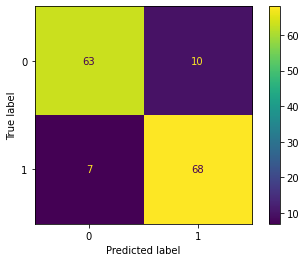

In [ ]:


def prepare_feature_acp740():
    label = []
    protein_seq_dict = {}
    protein_index = 0
    with open('acp740.txt', 'r') as fp:
        for line in fp:
            if line[0] == '>':
                values = line[1:].strip().split('|')
                label_temp = values[1]
#                proteinName = values[0]
                if label_temp == '1':
                    label.append(1)
                else:
                    label.append(0)
            else:
                seq = line[:-1]
                protein_seq_dict[protein_index] = seq
                protein_index = protein_index + 1
    bpf=[]
    for i in protein_seq_dict:  # and protein_fea_dict.has_key(protein) and RNA_fea_dict.has_key(RNA):
        bpf_feature = BPF(protein_seq_dict[i])
        bpf.append(bpf_feature)
    return np.array(bpf), label

def prepare_feature_acp240():
    label = []
    protein_seq_dict = {}
    protein_index = 1
    with open('acp240.txt', 'r') as fp:
        for line in fp:
            if line[0] == '>':
                values = line[1:].strip().split('|')
                label_temp = values[1]
#                protein = values[0]
                if label_temp=='1':
                    label.append(1)
                else:
                    label.append(0)
            else:
                seq = line[:-1]
                protein_seq_dict[protein_index] = seq
                protein_index = protein_index + 1
    bpf = []
    # get protein feature
    for i in protein_seq_dict:  # and protein_fea_dict.has_key(protein) and RNA_fea_dict.has_key(RNA):

        bpf_feature = BPF(protein_seq_dict[i])
        bpf.append(bpf_feature)
        protein_index = protein_index + 1

    return np.array(bpf), label

def BPF(seq_temp):
    seq = seq_temp
#    chars = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
    fea = []
    tem_vec =[]
    k = 7
    for i in range(k):
        if seq[i] =='A':
            tem_vec = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif seq[i]=='C':
            tem_vec = [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif seq[i]=='D':
            tem_vec = [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif seq[i]=='E':
            tem_vec = [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif seq[i]=='F':
            tem_vec = [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif seq[i]=='G':
            tem_vec = [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif seq[i]=='H':
            tem_vec = [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif seq[i]=='I':
            tem_vec = [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]
        elif seq[i]=='K':
            tem_vec = [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0]
        elif seq[i]=='L':
            tem_vec = [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]
        elif seq[i]=='M':
            tem_vec = [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]
        elif seq[i]=='N':
            tem_vec = [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0]
        elif seq[i]=='P':
            tem_vec = [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]
        elif seq[i]=='Q':
            tem_vec = [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0]
        elif seq[i]=='R':
            tem_vec = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0]
        elif seq[i]=='S':
            tem_vec = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]
        elif seq[i]=='T':
            tem_vec = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]
        elif seq[i]=='V':
            tem_vec = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0]
        elif seq[i]=='W':
            tem_vec = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]
        elif seq[i]=='Y':
            tem_vec = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
        fea = fea + tem_vec
    return fea


def calculate_performace(test_num, pred_y, labels):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for index in range(test_num):
        if labels[index] == 1:
            if labels[index] == pred_y[index]:
                tp = tp + 1
            else:
                fn = fn + 1
        else:
            if labels[index] == pred_y[index]:
                tn = tn + 1
            else:
                fp = fp + 1

    acc = float(tp + tn) / test_num
    precision = float(tp) / (tp + fp)
    sensitivity = float(tp) / (tp + fn)
    specificity = float(tn) / (tn + fp)
    MCC = float(tp * tn - fp * fn) / (np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)))
    return acc, precision, sensitivity, specificity, MCC

def ACP_Boost():
    # define parameters
    num_cross_val = 5  # 5-fold
    all_performance_lstm = []
#    all_labels = []
    all_prob = {}
    all_prob[0] = []

    for fold in range(num_cross_val):
        train = np.array([x for i, x in enumerate(X) if i % num_cross_val != fold])
        test = np.array([x for i, x in enumerate(X) if i % num_cross_val == fold])
        train_label = np.array([x for i, x in enumerate(label) if i % num_cross_val != fold])
        test_label = np.array([x for i, x in enumerate(label) if i % num_cross_val == fold])
#        print(len(train))
#        print(len(train_label))
        
        real_labels = []
        for val in test_label:
            if val == 1:
                real_labels.append(1)
            else:
                real_labels.append(0)

        



## Updated Model for Prediction using N10 Binary Profile Feature+Amino Acid Index+Amino Acid Composition


#        clf = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,100),alpha = 0.1,activation = 'tanh', random_state=120,max_iter=500,solver='adam',learning_rate='adaptive')
#        clf = RandomForestClassifier(random_state=120,n_estimators=300,min_samples_split=10,min_samples_leaf=1,max_features='auto',bootstrap=False)   
#        clf = ExtraTreesClassifier(random_state=120,n_estimators=400,max_depth=32,min_samples_split=10,min_samples_leaf=1,max_features='auto',bootstrap=False)
#        clf = KNeighborsClassifier(n_neighbors =9)
#        clf = svm.SVC(kernel="linear")
 

#Bootstrap Model for Prediction 
        
#        clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=120,n_estimators=300,min_samples_split=10,min_samples_leaf=1,max_features='auto',bootstrap=False),random_state = 121,n_estimators=406,learning_rate=0.04)
        clf = GradientBoostingClassifier(random_state=121,n_estimators=350,learning_rate=0.1,loss='deviance')

        model = clf.fit(train, train_label)
        
        y_pred_xgb = model.predict(test)



        acc, precision, sensitivity, specificity, MCC = calculate_performace(len(real_labels), y_pred_xgb, real_labels)
        print(acc, precision, sensitivity, specificity, MCC)
        all_performance_lstm.append([acc, precision, sensitivity, specificity, MCC])


    print('mean performance of ACP_Boost')
    print(np.mean(np.array(all_performance_lstm), axis=0))



#Confusion Matrix Plot
    ConfusionMatrixDisplay.from_predictions(test_label,y_pred_xgb)
    plt.show    




dataset = 1#1.acp740   2.acp240
peptidelen = 50

if dataset == 1:
#    delta = 0.02  #acp740
#    augtimes = 2
    bpf, label = prepare_feature_acp740()
    X_aac, label = AAC_740()
    if peptidelen == 40:
        data = pickle.load(open('data740_40_50.pkl', 'rb'))
    elif peptidelen == 50:
        data = pickle.load(open('data740_50_50.pkl', 'rb'))
    elif peptidelen == 60:      
        data = pickle.load(open('data740_60_50.pkl', 'rb'))
else:
#    delta = 0.005  #acp240
#    augtimes = 1
    bpf, label = prepare_feature_acp240()
    X_aac, label = AAC_240()
    if peptidelen == 40:
        data = pickle.load(open('data240_40_50.pkl', 'rb'))
    elif peptidelen == 50:
        data = pickle.load(open('data240_50_50.pkl', 'rb'))
    elif peptidelen == 60:      
        data = pickle.load(open('data240_60_50.pkl', 'rb'))    

X_aa = data['X']
X_aa = np.array(X_aa)
X = np.concatenate((bpf, X_aa,X_aac), axis=1)   

ACP_Boost()

In [ ]:
(bpf[0])

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
X_aa

array([[  41.  ,    0.67,    0.  , ...,    8.5 ,    0.  ,    1.99],
       [  41.  ,    0.67,    0.  , ...,    8.5 ,    0.  ,    2.34],
       [ 128.  ,    0.79,    0.  , ...,   11.2 ,    0.  ,    0.  ],
       ...,
       [ 103.  ,    0.98,    0.  , ...,   15.  ,    0.  ,    2.18],
       [-148.  ,    0.79,    0.  , ...,    7.9 ,    0.  ,    0.  ],
       [  36.  ,    0.76,    0.  , ...,    8.8 ,    0.  ,    0.  ]])

In [ ]:
X_aac

array([[0.13043478, 0.        , 0.        , ..., 0.        , 0.04347826,
        0.        ],
       [0.38095238, 0.        , 0.        , ..., 0.        , 0.28571429,
        0.        ],
       [0.30769231, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.05555556, 0.        , 0.05555556, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07692308, 0.07692308, 0.        , ..., 0.        , 0.        ,
        0.23076923]])